# Business Problem


The client is a fashion e-commerce company who aims to increase customer retention and boost sales by gaining insights into how shoppers interact with its shopping platform. Currently, marketing campaigns and product recommendations are generic, therefore limiting engagement and conversion. The client aims to uncover what drives purchasing decisions(demographics, product categories, past purchases, and promotions) to tailor its offerings to customers. By analyzing shopping behaviour, the client eventually aims to:

*   Identify customer segments with unique preferences.
*   Recommend products more effectively to encourage repeat purchases.
*   Optimize promotions such as discounts and promo codes.


The dataset was obtained from **Kaggle** and it contains transaction-level information from the fashion e-commerce platform and it includes:

* Demographics: Age, Gender

* Purchases: Item Purchased, Category (e.g., Clothing, Shoes, Accessories), Purchase Amount (USD)

* Behavioral Factors: Review Rating, Previous Purchases, Payment Method, Frequency of Purchases, Promo Code Usage

The link to the dataset -> https://www.kaggle.com/datasets/zubairamuti/shopping-behaviours-dataset

The exploratory data analysis aims to uncover how customer demographics influence spending habits, identify top-performing product categories, and understand the role of reviews and past purchases in shaping buying decisions. It also evaluates the effectiveness of promotions in driving sales and segments customers into groups such as loyal high spenders, and occasional shoppers. The expected outcomes include actionable insights into customer behavior, evidence to optimize promotions, guidance for inventory and product focus, and customer segments that enable more targeted and personalized marketing campaigns.

By applying these insights, the fashion e-commerce company can design smarter campaigns, optimize its product mix, and deliver more relevant shopping experiences—ultimately boosting revenue and customer loyalty.

# Importing of Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Data Exploration

In [2]:
# Load the dataset
df = pd.read_csv('/content/shopping_behavior.csv')

# Display the first 5 rows
display(df.head())

# Print column names and their data types
df.info()

# Check for missing values
display(df.isnull().sum())

# Generate descriptive statistics for numerical columns
display(df.describe())

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [3]:
# Explore unique values and counts for categorical columns
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].value_counts())

# Check for duplicate rows
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Unique values in 'Gender':
Gender
Male      2652
Female    1248
Name: count, dtype: int64

Unique values in 'Item Purchased':
Item Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

Unique values in 'Category':
Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

Unique values in 'Location':
Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware 

# Data Preprocessing

Converting the categorical columns 'Discount Applied', 'Promo Code Used', and 'Subscription Status' to numerical representation (1 for 'Yes' and 0 for 'No') and storing the result in a new dataframe df_processed.

In [4]:
df_processed = df.copy()

df_processed['discount_flag'] = df_processed['Discount Applied'].apply(lambda x: 1 if x == 'Yes' else 0)
df_processed['promo_flag'] = df_processed['Promo Code Used'].apply(lambda x: 1 if x == 'Yes' else 0)
df_processed['subscription_flag'] = df_processed['Subscription Status'].apply(lambda x: 1 if x == 'Yes' else 0)

display(df_processed[['Discount Applied', 'discount_flag', 'Promo Code Used', 'promo_flag', 'Subscription Status', 'subscription_flag']].head())

,Discount Applied,discount_flag,Promo Code Used,promo_flag,Subscription Status,subscription_flag
0,Yes,1,Yes,1,Yes,1
1,Yes,1,Yes,1,Yes,1
2,Yes,1,Yes,1,Yes,1
3,Yes,1,Yes,1,Yes,1
4,Yes,1,Yes,1,Yes,1


# Explanatory Data Visualization


## Insight 1: Relationship between Age, Purchase Amount, and Gender

**Business Importance**

It is essential to understand how age and gender influence purchase amount. This helps with product development and targeted marketing. If certain age groups or genders tend to make certain purchases, the client can tailor product recommendations,  advertising campaigns, and pricing strategies to these specific customer segments. Identifying the significant differences in spending habits between genders within different age brackets can further refine these strategies, bringing about more effective customer engagement and eventually increased revenue. For instance, if younger men show propensity for purchasing certain items, marketing efforts can be specifically targeted to this demographic.

In [5]:
fig = px.scatter(df_processed, x='Age', y='Purchase Amount (USD)', color='Gender',
                 title='Purchase Amount vs. Age by Gender',
                 labels={'Age': 'Customer Age', 'Purchase Amount (USD)': 'Purchase Amount (USD)'})
fig.show()

**Code Description**

The scatter plot was generated using the `plotly.express` library, which is a high-level interface for creating interactive plots.
- `px.scatter()` was used to create the scatter plot.
- `df_processed` was provided as the DataFrame containing the data.
- `x='Age'` mapped the 'Age' column to the x-axis.
- `y='Purchase Amount (USD)'` mapped the 'Purchase Amount (USD)' column to the y-axis.
- `color='Gender'` colored the data points based on the 'Gender' column, allowing for visual differentiation between male and female customers.
- `title='Purchase Amount vs. Age by Gender'` set the title of the plot.
- `labels={'Age': 'Customer Age', 'Purchase Amount (USD)': 'Purchase Amount (USD)'}` provided more descriptive labels for the axes.
- `fig.show()` displayed the interactive plot.

**Insight and Story**

The scatter plot of 'Purchase Amount (USD)' versus 'Age', colored by 'Gender', reveals that purchase amounts appear to be relatively spread across all age groups for both genders. There doesn't seem to be a strong linear correlation or a clear clustering of high or low purchase amounts based on age or gender alone in this overall view. Both male and female customers across the age spectrum are making purchases with varied amounts.

However, the visualization allows for interactive exploration. By hovering over individual points, the specific age, gender, and purchase amount for each customer can be seen. This initial view suggests that while there isn't a simple overarching trend, there might be more nuanced patterns within specific age ranges or for particular product categories (which are not visualized in this specific plot).

For instance, it can be observed that there are high-value purchases made by both younger and older customers, and by both men and women. This could imply that purchasing power or willingness to spend is not solely dictated by age or gender in this dataset. A compelling story here is that while broad demographic targeting based on age and gender might have limited effectiveness for purchase amount prediction alone, a deeper dive into *what* items are being purchased by *whom* at *what* age could reveal more actionable insights for personalized recommendations and inventory management. This initial plot serves as a foundation, indicating that simple demographic segmentation might need to be combined with behavioral or item-specific data for more effective strategies.


## Insight 2: Revenue Contribution by Category and Item

**Business Importance**

Identifying which product categories and specific items generate the most revenue is fundamental for business strategy. This insight directly impacts inventory management, marketing focus, and product development decisions. The client can prioritize stocking popular, high-revenue items, allocate larger marketing budgets to profitable categories, and identify potential areas for growth or divestment. Understanding the revenue hierarchy helps in optimizing resources and maximizing profitability.

In [21]:
category_item_revenue = df_processed.groupby(['Category', 'Item Purchased'])['Purchase Amount (USD)'].sum().reset_index()

# Calculate total revenue
total_revenue = category_item_revenue['Purchase Amount (USD)'].sum()

# Calculate percentage for categories
category_revenue = category_item_revenue.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
category_revenue['Percentage'] = (category_revenue['Purchase Amount (USD)'] / total_revenue) * 100

# Merge category percentages back to the original dataframe
category_item_revenue = pd.merge(category_item_revenue, category_revenue[['Category', 'Percentage']], on='Category', how='left')

fig = px.sunburst(category_item_revenue, path=['Category', 'Item Purchased'], values='Purchase Amount (USD)',
                  title='Total Purchase Amount by Category and Item Purchased',
                  hover_data={'Purchase Amount (USD)': ':.2f', 'Percentage': ':.2f%'}, # Add percentage to hover info for both categories and items
                 )

# Update hover template to show percentage only for categories
fig.update_traces(hovertemplate='<b>%{label}</b><br>Total Purchase Amount: %{value:.2f} USD<br>Percentage of Total Revenue: %{customdata[1]:.2f}%<extra></extra>')

fig.show()

**Code Description**

* `category_item_revenue = df_processed.groupby(['Category', 'Item Purchased'])['Purchase Amount (USD)'].sum().reset_index()`: This line is the same as before, grouping the data by 'Category' and 'Item Purchased' and calculating the sum of 'Purchase Amount (USD)' for each combination. `reset_index()` converts the grouped output back into a DataFrame.

* `total_revenue = category_item_revenue['Purchase Amount (USD)'].sum()`: This calculates the total sum of 'Purchase Amount (USD)' across all categories and items, which will be used to calculate percentages.

* `category_revenue = category_item_revenue.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()`: This groups the `category_item_revenue` DataFrame by 'Category' to get the total revenue for each main category.

* `category_revenue['Percentage'] = (category_revenue['Purchase Amount (USD)'] / total_revenue) * 100`: This calculates the percentage contribution of each main category to the `total_revenue`.

* `category_item_revenue = pd.merge(category_item_revenue, category_revenue[['Category', 'Percentage']], on='Category', how='left')`: This merges the calculated category percentages back into the `category_item_revenue` DataFrame. Now, each row (representing a Category-Item combination) also includes the percentage of total revenue contributed by its main Category.

* `fig = px.sunburst(...)`: This line creates the sunburst chart using `plotly.express`, similar to the previous sunburst chart code.
    *   `hover_data={'Purchase Amount (USD)': ':.2f', 'Percentage': ':.2f%'}`: This is a key addition. It specifies that when you hover over a segment in the sunburst chart, the hover box should display the 'Purchase Amount (USD)' formatted to two decimal places (`:.2f`) and the 'Percentage' formatted as a percentage to two decimal places (`:.2f%`).

* `fig.update_traces(hovertemplate='<b>%{label}</b><br>Total Purchase Amount: %{value:.2f} USD<br>Percentage of Total Revenue: %{customdata[1]:.2f}%<extra></extra>')`: This line customizes the hover template for the traces (the sunburst segments).
    *   `<b>%{label}</b>`: Displays the label of the segment (either the category or the item name) in bold.
    *   `<br>Total Purchase Amount: %{value:.2f} USD`: Displays the value associated with the segment (the sum of purchase amount) formatted to two decimal places.
    *   `<br>Percentage of Total Revenue: %{customdata[1]:.2f}%`: This is where the category percentage is displayed. `%{customdata[1]}` accesses the second item in the `customdata` array that plotly creates internally, which in this case corresponds to the 'Percentage' column we added and specified in `hover_data`. It formats this value as a percentage.
    *   `<extra></extra>`: This removes the default extra information box that plotly sometimes adds.

* `fig.show()`: This displays the interactive sunburst chart with the enhanced hover information.

**Insight and Story**

The sunburst chart provides a clear and intuitive visualization of how revenue is distributed across different product categories and the specific items within them. The size of each segment in the chart is proportional to the total revenue generated. This allows for quick identification of the top-performing categories and items.

From the sunburst chart, we can immediately see which categories occupy the largest area, indicating their significant contribution to overall revenue. Within each category, we can then see the breakdown by individual items. For example, from the 'Clothing' segment being the largest, we can then examine the inner rings to see which clothing items (e.g., 'Blouse', 'Jeans', 'Sweater') are the biggest revenue drivers within that category.

The story from this insight is that it provides a data-driven basis for strategic decisions. Instead of relying on assumptions, the business can use this visualization to confirm that their focus on certain categories or items is justified by revenue, or conversely, identify underperforming areas that might require attention. For instance, if a particular item within a major category has a surprisingly small segment, it might warrant investigation into its marketing, pricing, or availability.

## Insight 3: Correlation between Numerical Features

**Business Importance**

The correlation between numerical features is important for identifying potential relationships within the data. Strong correlations between any two variables can inform business decisions. For example, a high positive correlation between 'Previous Purchases' and 'Purchase Amount (USD)' might suggest that loyal customers tend to spend more, justifying loyalty programs. Conversely, understanding weak or negligible correlations can prevent businesses from investing in strategies based on unrelated factors.

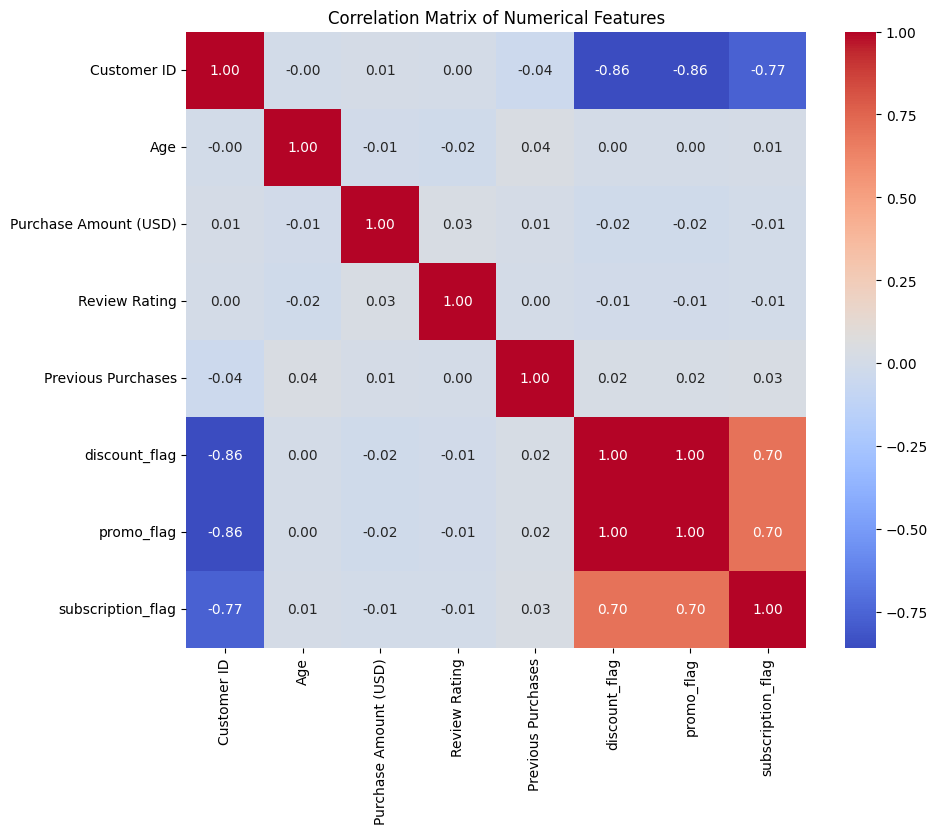

In [7]:
numeric_df = df_processed.select_dtypes(include=np.number)
corr = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Code Description**

The heatmap visualizes the pairwise correlation coefficients between all numerical columns in the `df_processed` DataFrame.
- `numeric_df = df_processed.select_dtypes(include=np.number)` selected only the columns with numerical data types.
- `corr = numeric_df.corr()` calculated the Pearson correlation matrix for these numerical columns.
- `plt.figure(figsize=(10, 8))` created a figure with a specified size to ensure the heatmap is readable.
- `sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")` generated the heatmap:
    - `corr` is the correlation matrix to be plotted.
    - `annot=True` displays the correlation coefficient values on the heatmap cells.
    - `cmap='coolwarm'` sets the color scheme, using cool colors for negative correlations and warm colors for positive correlations.
    - `fmt=".2f"` formats the annotation to two decimal places.
- `plt.title('Correlation Matrix of Numerical Features')` set the title of the heatmap.
- `plt.show()` displayed the plot.

**Insight and Story**

The correlation heatmap reveals the strength and direction of linear relationships between the numerical variables. By examining the color intensity and the annotated values, the pairs of variables that are strongly correlated can be seen.

A key observation from this heatmap is the strong positive correlation between `discount_flag` and `promo_flag` (correlation coefficient of 1.00). This is expected and confirms that these two flags essentially represent the same information, indicating whether a discount or promo code was applied. The strong positive correlation between `discount_flag`, `promo_flag`, and `subscription_flag` (around 0.70) suggests that customers who use discounts or promo codes are also more likely to have a subscription. This could indicate that promotional offers are effective in driving subscriptions, or that subscribers are more inclined to use available promotions.

Conversely, the heatmap shows very weak correlations (values close to 0) between most other pairs of variables, such as 'Age' and 'Purchase Amount (USD)', 'Review Rating' and 'Purchase Amount (USD)', and 'Previous Purchases' and 'Purchase Amount (USD)'. This suggests that in this dataset, age, review ratings, and the number of previous purchases do not have a strong linear relationship with the current purchase amount.

The story here is that while promotional activities and subscriptions show a notable relationship, key customer attributes like age and past purchasing frequency, at least when considered in isolation, do not strongly predict the value of a single purchase. This indicates that a more nuanced approach might be needed for predicting purchase amounts, possibly involving interactions between variables or non-linear relationships. The high correlation between the flags also suggests that one of the promo/discount flags could potentially be removed for simplicity in future modeling, as they provide redundant information.


## Insight 4: Purchase Amount vs. Previous Purchases by Subscription Status

**Business Importance**

Analyzing the relationship between the number of previous purchases, the current purchase amount, and a customer's subscription status is critical for understanding customer loyalty, the effectiveness of subscription programs, and identifying high-value customers. Do customers who have made more previous purchases tend to spend more on their current transactions? Does being a subscriber influence this relationship? This insight can help businesses:
- Assess the value of loyal customers and subscribers.
- Determine if subscription benefits encourage higher spending.
- Identify potential customer segments for targeted retention or upsell campaigns.
- Evaluate the overall success of loyalty and subscription initiatives.

In [8]:
fig = px.scatter(df_processed, x='Previous Purchases', y='Purchase Amount (USD)', color='Subscription Status',
                 title='Purchase Amount vs. Previous Purchases by Subscription Status',
                 labels={'Previous Purchases': 'Number of Previous Purchases', 'Purchase Amount (USD)': 'Purchase Amount (USD)'})
fig.show()

**Code Description**

This scatter plot, generated using `plotly.express`, visualizes the relationship between the number of previous purchases and the purchase amount, with points colored based on whether the customer has a subscription.
- `px.scatter()` is used to create the scatter plot.
- `df_processed` provides the data.
- `x='Previous Purchases'` maps the number of previous purchases to the x-axis, indicating customer loyalty or engagement over time.
- `y='Purchase Amount (USD)'` maps the current purchase amount to the y-axis, representing the value of the current transaction.
- `color='Subscription Status'` colors the data points based on the 'Subscription Status' column ('Yes' or 'No'), allowing us to differentiate between subscribers and non-subscribers.
- `title='Purchase Amount vs. Previous Purchases by Subscription Status'` sets a descriptive title for the plot.
- `labels={'Previous Purchases': 'Number of Previous Purchases', 'Purchase Amount (USD)': 'Purchase Amount (USD)'}` provides clear labels for the axes.
- `fig.show()` displays the interactive plot.

**Insight and Story**

The scatter plot shows the distribution of individual purchase amounts against the number of previous purchases, separated by subscription status. Observing the plot, we can see that both subscribers(colored differently) and non-subscribers are spread across various levels of previous purchases and current purchase amounts.

There doesn't appear to be a clear, strong linear trend indicating that having more previous purchases directly leads to a significantly higher *single* purchase amount, for either subscribers or non-subscribers. High purchase amounts are observed across the spectrum of previous purchase counts.

However, by looking at the distribution of the colored points, we can start to build a story. If subscribers (e.g., in blue) are more densely clustered in the areas of higher previous purchases compared to non-subscribers (e.g., in red), it would suggest that the subscription program successfully retains customers and encourages repeat business. We can also visually inspect if there's a noticeable difference in the *range* or *average* purchase amounts between subscribers and non-subscribers, particularly among those with a high number of previous purchases.

For example, if we see a concentration of blue points (subscribers) in the upper-right quadrant (high previous purchases, high current purchase amount), it would tell a compelling story that the subscription program is effectively cultivating loyal, high-spending customers. Conversely, if subscribers are scattered similarly to non-subscribers, it might suggest the subscription's primary benefit isn't necessarily driving up the value of individual transactions, but perhaps focuses on other aspects like frequency or discounts. This visualization helps to visually test these hypotheses and understand the interplay between loyalty, spending, and the impact of the subscription program.

## Insight 5: Revenue Contribution by Payment Method

**Business Importance**

Understanding which payment methods contribute most to overall revenue is essential for optimizing payment processing, negotiating transaction fees, and potentially offering incentives for preferred payment methods. If a significant portion of revenue comes from a specific payment method, ensuring its reliability and efficiency is important. Conversely, if a payment method has high transaction costs but low revenue contribution, the business might consider de-prioritizing it or encouraging customers to use alternatives. This insight helps in financial planning and operational efficiency

In [9]:
payment_method_revenue = df_processed.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()

fig = px.treemap(payment_method_revenue, path=['Payment Method'], values='Purchase Amount (USD)',
                 title='Total Purchase Amount by Payment Method')
fig.show()

**Code Description**

The treemap visualizes the total purchase amount for each payment method, providing a hierarchical view of revenue contribution.
- `df_processed.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()` aggregates the data to calculate the total 'Purchase Amount (USD)' for each unique 'Payment Method'. `reset_index()` converts the grouped output back into a DataFrame.
- `px.treemap()` is used to generate the treemap.
- `payment_method_revenue` provides the aggregated data.
- `path=['Payment Method']` defines the hierarchy for the treemap, in this case, just the 'Payment Method' itself.
- `values='Purchase Amount (USD)'` specifies that the size of each rectangle in the treemap represents the total 'Purchase Amount (USD)' for that payment method.
- `title='Total Purchase Amount by Payment Method'` sets the title of the plot.
- `fig.show()` displays the interactive treemap.

**Insight and Story**

The treemap of total purchase amount by payment method clearly shows the relative revenue generated by each payment option. Each rectangle in the treemap represents a payment method, and its size is proportional to the total revenue processed through that method.

By quickly scanning the treemap, we can identify the largest rectangles, which correspond to the payment methods that bring in the most revenue. For example, if 'Credit Card' and 'PayPal' occupy the largest areas, it tells a compelling story that these are the dominant payment methods for high-value transactions or are simply the most frequently used overall.

Conversely, smaller rectangles indicate payment methods with lower revenue contributions. This could be because they are less popular, used for smaller transactions, or have a smaller user base among the customers. This visualization provides a clear and immediate understanding of the financial significance of each payment method. It can prompt business questions such as: Are we offering enough popular payment options? Should we promote certain payment methods with lower transaction fees? Are there any payment methods underperforming relative to their perceived popularity? The treemap serves as a valuable tool for financial analysis and optimizing payment processing strategies.

## Insight 6: Category Performance: Balancing Popularity and Average Spend

**Business Importance**

Analyzing product categories based on both the volume of purchases and the average purchase amount provides a more nuanced view of their performance beyond just total revenue. Some categories might be popular with many transactions but have a low average spend, while others might have fewer transactions but a high average spend. Understanding this balance helps businesses:
- Identify 'star' categories that drive both volume and value.
- Recognize 'traffic drivers' (high volume, low average spend) that bring customers to the site.
- Pinpoint 'high-value niches' (low volume, high average spend) that cater to specific customer segments.
- Tailor marketing and inventory strategies based on a category's position on the popularity vs. average spend spectrum.


In [10]:
cat_avg = df_processed.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()
cat_counts = df_processed['Category'].value_counts().reset_index()
cat_counts.columns = ['Category', 'count']

cat_bubble_data = pd.merge(cat_avg, cat_counts, on='Category')
cat_bubble_data['n_total'] = cat_bubble_data['count']

# Scale marker size for better visualization
marker_sizes = cat_bubble_data['n_total'] / cat_bubble_data['n_total'].max() * 50 # Adjust scaling factor as needed

fig = px.scatter(cat_bubble_data, x='count', y='Purchase Amount (USD)', size=marker_sizes, color='Category',
                 hover_name='Category', size_max=60,
                 title='Average Purchase Amount vs. Number of Purchases by Category',
                 labels={'count': 'Number of Purchases', 'Purchase Amount (USD)': 'Average Purchase Amount (USD)'})
fig.show()

**Code Description**

This bubble chart visualizes the relationship between the number of purchases (popularity) and the average purchase amount (value per transaction) for each product category. The size of each bubble represents the total number of purchases in that category.
- `df_processed.groupby('Category')['Purchase Amount (USD)'].mean().reset_index()` calculates the average purchase amount for each category.
- `df_processed['Category'].value_counts().reset_index()` counts the number of transactions for each category.
- `pd.merge()` combines these two dataframes based on the 'Category'.
- A new column `n_total` is created for clarity, holding the purchase counts.
- `marker_sizes` are calculated by scaling the 'n_total' values to control the visual size of the bubbles in the plot.
- `px.scatter()` generates the bubble chart:
    - `cat_bubble_data` is the input DataFrame.
    - `x='count'` maps the number of purchases to the x-axis.
    - `y='Purchase Amount (USD)'` maps the average purchase amount to the y-axis.
    - `size=marker_sizes` sets the size of the bubbles based on the scaled purchase counts.
    - `color='Category'` colors the bubbles uniquely for each category.
    - `hover_name='Category'` ensures the category name is displayed when hovering over a bubble.
    - `size_max=60` sets the maximum size for the bubbles.
    - `title='Average Purchase Amount vs. Number of Purchases by Category'` sets the plot title.
    - `labels={'count': 'Number of Purchases', 'Purchase Amount (USD)': 'Average Purchase Amount (USD)'}` provides clear axis labels.
- `fig.show()` displays the interactive plot.

**Insight and Story**

The bubble chart provides a compelling visual story about the performance of different product categories. Each bubble represents a category, and its position tells us about its popularity (x-axis) and average transaction value (y-axis). The size of the bubble gives us an additional dimension: the total volume of transactions.

By examining the chart, we can immediately identify categories that fall into different performance quadrants. For example:
- **High Volume, High Average Spend:** Bubbles in the upper-right are ideal 'star' categories. They are popular and bring in high revenue per transaction.
- **High Volume, Lower Average Spend:** Bubbles in the lower-right are 'traffic drivers'. They attract many customers but individual transactions are smaller.
- **Lower Volume, High Average Spend:** Bubbles in the upper-left represent 'high-value niches'. They might cater to a smaller customer base but generate significant revenue per transaction.
- **Lower Volume, Lower Average Spend:** Bubbles in the lower-left might be underperforming categories.

The size of the bubbles adds another layer of understanding. Two categories might have similar average purchase amounts, but the larger bubble indicates a much higher total transaction volume and thus greater overall contribution. This visualization moves beyond simply looking at total revenue per category (as in the treemap) to analyze the underlying dynamics of customer engagement (volume) and spending behaviour (average value). It empowers businesses to make strategic decisions about where to invest their marketing efforts, optimize inventory, and potentially refine pricing strategies based on a category's specific performance profile.


## Insight 7: Seasonal Trends in Average Purchase Amount

**Business Importance**

Understanding how average purchase amounts fluctuate across different seasons is crucial for inventory planning, marketing campaign timing, and budgeting. Seasonal trends can reveal peak periods for spending, allowing the business to prepare with adequate stock and targeted promotions. Conversely, identifying periods of lower average spending can inform strategies to boost sales during those times, perhaps through special seasonal offers or product lines. This insight helps businesses align their operations and marketing efforts with customer behavior throughout the year, optimizing sales and profitability.

In [22]:
seasonal_purchase = df_processed.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()

# Define a clear order for seasons for the line plot
season_order = ['Spring', 'Summer', 'Fall', 'Winter'] # Corrected 'Autumn' to 'Fall' based on common usage and potential data values
seasonal_purchase['Season'] = pd.Categorical(seasonal_purchase['Season'], categories=season_order, ordered=True)
seasonal_purchase = seasonal_purchase.sort_values('Season')

fig = px.line(seasonal_purchase, x='Season', y='Purchase Amount (USD)', markers=True,
              title='Average Purchase Amount by Season',
              labels={'Season': 'Season', 'Purchase Amount (USD)': 'Average Purchase Amount (USD)'})
fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':season_order})

# Find the lowest point
lowest_point = seasonal_purchase.loc[seasonal_purchase['Purchase Amount (USD)'].idxmin()]

# Add a red dot annotation at the lowest point
fig.add_trace(go.Scatter(
    x=[lowest_point['Season']],
    y=[lowest_point['Purchase Amount (USD)']],
    mode='markers',
    marker=dict(color='red', size=10),
    name=f"Lowest: {lowest_point['Purchase Amount (USD)']:.2f}" # Add name for legend
))


fig.show()

## Insight 8: Seasonal Trends in Average Purchase Amount

**Code Description**

This code generates a line plot using `plotly.express` to visualize the average purchase amount across different seasons and highlights the season with the lowest average purchase amount.

* `seasonal_purchase = df_processed.groupby('Season')['Purchase Amount (USD)'].mean().reset_index()`: This line groups the `df_processed` DataFrame by the 'Season' column and calculates the mean of the 'Purchase Amount (USD)' for each season. `reset_index()` converts the result back into a DataFrame.

* `season_order = ['Spring', 'Summer', 'Fall', 'Winter']`: This line defines a list specifying the desired order of seasons for the plot. It's important to define this order explicitly to ensure the line plot connects the seasons chronologically. Note the correction from 'Autumn' to 'Fall' to match common usage and potentially the data values.

* `seasonal_purchase['Season'] = pd.Categorical(seasonal_purchase['Season'], categories=season_order, ordered=True)`: This line converts the 'Season' column in the `seasonal_purchase` DataFrame to a Pandas Categorical data type. This is done to enforce the `season_order` when plotting. The `ordered=True` argument ensures that the order of categories matters.

* `seasonal_purchase = seasonal_purchase.sort_values('Season')`: This sorts the `seasonal_purchase` DataFrame based on the ordered 'Season' column, ensuring the data is in the correct sequence for the line plot.

* `fig = px.line(...)`: This line creates the line plot using `plotly.express`.
    *   `seasonal_purchase` is the DataFrame containing the data to be plotted.
    *   `x='Season'` maps the 'Season' column to the x-axis.
    *   `y='Purchase Amount (USD)'` maps the average purchase amount to the y-axis.
    *   `markers=True` adds markers to each data point on the line, making it easier to see the exact values for each season.
    *   `title='Average Purchase Amount by Season'` sets the title of the plot.
    *   `labels={'Season': 'Season', 'Purchase Amount (USD)': 'Average Purchase Amount (USD)'}` provides clear labels for the axes.

* `fig.update_layout(xaxis={'categoryorder':'array', 'categoryarray':season_order})`: This line explicitly tells Plotly to use the defined `season_order` for the categories on the x-axis. This is important because without it, Plotly might order the categories alphabetically or by value.

* `lowest_point = seasonal_purchase.loc[seasonal_purchase['Purchase Amount (USD)'].idxmin()]`: This line finds the row in the `seasonal_purchase` DataFrame where the 'Purchase Amount (USD)' is the minimum. `idxmin()` returns the index of the minimum value, and `.loc[]` is used to retrieve the entire row at that index.

* `fig.add_trace(go.Scatter(...))`: This line adds a new trace to the existing Plotly figure (`fig`) to highlight the lowest point.
    *   `go.Scatter(...)` creates a scatter plot trace.
    *   `x=[lowest_point['Season']]` and `y=[lowest_point['Purchase Amount (USD]']]` provide the coordinates for the single point to be plotted (the lowest point).
    *   `mode='markers'` specifies that this trace should be rendered as markers (dots).
    *   `marker=dict(color='red', size=10)` configures the appearance of the marker, setting its color to red and size to 10.
    *   `name=f"Lowest: {lowest_point['Purchase Amount (USD)']:.2f}"` sets the name for this trace, which will appear in the legend, indicating the season and the value of the lowest average purchase amount.

* `fig.show()`: This displays the interactive Plotly figure, which now includes the line plot showing seasonal trends and a red dot highlighting the season with the lowest average purchase amount, along with its value in the legend.

**Insight and Story**

The line plot clearly visualizes how the average purchase amount changes from Spring to Summer, Fall, and Winter. By observing the line's trajectory, seasonal patterns in customer spending can be identified. The highlighted lowest point immediately draws attention to the season with the lowest average transaction value.

For example, the plot might show that the average purchase amount is relatively stable during Spring and Summer but sees a noticeable increase in Fall and peaks in Winter. This would tell a compelling story about the impact of holiday seasons or colder weather on purchasing behavior, where customers might be buying more expensive items like outerwear or gifts. Conversely, if the plot shows a dip in Summer, highlighted by the red marker, it might suggest that customers are spending less on individual transactions during warmer months.

This insight is powerful because it provides a data-driven basis for seasonal strategies. If Winter shows the highest average spend, businesses can plan to stock more high-value items, launch premium product lines, and increase marketing spend during this period. If Summer is a lower-spending season, highlighted as the lowest point, they might focus on volume-driving promotions or introduce lighter, less expensive items to counteract the lower average spend. The line plot, especially with the lowest point highlighted, transforms raw seasonal data into a clear, actionable trend that can directly inform inventory management, marketing calendars, and sales forecasting throughout the year, allowing businesses to proactively address seasonal variations in customer spending.

## Insight 8: Customer Flow from Product Category to Payment Method

**Business Importance**

Understanding the relationship between the product categories customers purchase from and the payment methods they use is valuable for several business functions. This insight can inform:
- **Payment Gateway Optimization:** Are certain payment methods preferred for specific high-value categories? Businesses can prioritize the efficiency and reliability of those payment gateways.
- **Targeted Marketing:** If customers buying from a particular category predominantly use a specific payment method, marketing efforts for that category could be tailored with payment-specific promotions.
- **Fraud Detection:** Deviations from typical category-to-payment method flows might flag suspicious activity.
- **Customer Experience:** Ensuring seamless payment options are available for the categories customers are interested in can improve the checkout process and reduce cart abandonment.

In [13]:
# Select two categorical columns (e.g., 'Category' and 'Payment Method')
cat1 = 'Category'
cat2 = 'Payment Method'

# Group by selected categories and count occurrences
sankey_data = df_processed.groupby([cat1, cat2]).size().reset_index(name='count')

display(sankey_data.head())

,Category,Payment Method,count
0,Accessories,Bank Transfer,180
1,Accessories,Cash,214
2,Accessories,Credit Card,218
3,Accessories,Debit Card,195
4,Accessories,PayPal,232


In [24]:
# Create labels for the Sankey diagram nodes
label = list(sankey_data[cat1].unique()) + list(sankey_data[cat2].unique())

# Create dictionaries to map categories to indices
category_dict = {category: i for i, category in enumerate(sankey_data[cat1].unique())}
payment_dict = {payment: i + len(sankey_data[cat1].unique()) for i, payment in enumerate(sankey_data[cat2].unique())}

# Create source, target, and value lists for the Sankey diagram
source = sankey_data[cat1].map(category_dict)
target = sankey_data[cat2].map(payment_dict)
value = sankey_data['count']

# Define colors for categories and payment methods using a colorblind-friendly palette
# Plotly has a 'colorblind' palette in px.colors.qualitative
num_categories = len(sankey_data[cat1].unique())
num_payments = len(sankey_data[cat2].unique())

# Ensure we have enough colors in the palette
colorblind_palette = px.colors.qualitative.Plotly + px.colors.qualitative.Safe + px.colors.qualitative.Vivid

category_colors = colorblind_palette[:num_categories]
payment_colors = colorblind_palette[num_categories : num_categories + num_payments]

node_colors = category_colors + payment_colors

# Create the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
      pad=15,
      thickness=20,
      line=dict(color="black", width=0.5),
      label=label,
      color=node_colors # Assign colors to nodes
    ),
    link=dict(
      source=source,
      target=target,
      value=value,
      color=[node_colors[i] for i in source] # Assign source node color to links
  ))])

fig.update_layout(title_text=f"Flow from {cat1} to {cat2}", font_size=10)
fig.show()

**Code Description**

This code generates a Sankey diagram using `plotly.graph_objects` to visualize the flow of transactions from product categories to payment methods, enhancing the visualization with colorblind-friendly colors.

* `label = list(sankey_data[cat1].unique()) + list(sankey_data[cat2].unique())`: This line creates a list of all unique category names (`cat1`) and payment method names (`cat2`) from the `sankey_data` DataFrame. These will be used as the labels for the nodes in the Sankey diagram.

* `category_dict = {category: i for i, category in enumerate(sankey_data[cat1].unique())}`: This creates a dictionary that maps each unique category name to a numerical index starting from 0. This is necessary because Sankey diagrams in Plotly use numerical indices to define the source and target of the links.

* `payment_dict = {payment: i + len(sankey_data[cat1].unique()) for i, payment in enumerate(sankey_data[cat2].unique())}`: This creates a dictionary that maps each unique payment method name to a numerical index. The indices for payment methods start after the last index used for categories (`len(sankey_data[cat1].unique())`) to ensure that categories and payment methods have distinct indices.

* `source = sankey_data[cat1].map(category_dict)`: This line creates a list of source indices for the Sankey diagram. It uses the `category_dict` to map the category name in each row of `sankey_data` to its corresponding numerical index.

* `target = sankey_data[cat2].map(payment_dict)`: This line creates a list of target indices for the Sankey diagram. It uses the `payment_dict` to map the payment method name in each row of `sankey_data` to its corresponding numerical index.

* `value = sankey_data['count']`: This line gets the 'count' column from the `sankey_data` DataFrame, which represents the number of transactions for each category-payment method combination. These values determine the thickness of the links in the Sankey diagram.

* `num_categories = len(sankey_data[cat1].unique())` and `num_payments = len(sankey_data[cat2].unique())`: These lines calculate the number of unique categories and payment methods.

* `colorblind_palette = px.colors.qualitative.Plotly + px.colors.qualitative.Safe + px.colors.qualitative.Vivid`: This line combines several of Plotly's built-in qualitative color palettes to create a larger list of colors, aiming for colorblind-friendliness.

* `category_colors = colorblind_palette[:num_categories]` and **`payment_colors = colorblind_palette[num_categories : num_categories + num_payments]`: These lines select a sufficient number of colors from the combined palette to assign unique colors to each category and payment method node.

* `node_colors = category_colors + payment_colors`: This concatenates the category and payment colors to create a single list of colors corresponding to the order of labels defined earlier.

* `fig = go.Figure(data=[go.Sankey(...)])`: This line creates the Sankey diagram figure using `plotly.graph_objects`.
    *   `node=dict(...)`: This dictionary defines the appearance of the nodes.
        *   `pad=15`, `thickness=20`, `line=dict(color="black", width=0.5)`: These set the padding between nodes, the thickness of the nodes, and the appearance of their borders.
        *   `label=label`: Assigns the list of category and payment method names as labels for the nodes.
        *   `color=node_colors`: Assigns the generated color list to the nodes, giving each category and payment method a distinct color.
    *   `link=dict(...)`: This dictionary defines the appearance of the links.
        *   `source=source`, `target=target`, `value=value`: These specify the connections between nodes and the magnitude of the flow.
        *   `color=[node_colors[i] for i in source]`: This is a key part for visualization. It assigns the color of the *source* node to each link originating from that node. This makes it visually easier to follow the flow from a specific category to the different payment methods used for purchases in that category.

* `fig.update_layout(title_text=f"Flow from {cat1} to {cat2}", font_size=10)`: This sets the title of the Sankey diagram dynamically based on the selected categorical columns and adjusts the font size.

* `fig.show()`: This displays the interactive Sankey diagram.


**Insight and Story**

The Sankey diagram provides a visual narrative of how customer purchasing behavior in different product categories flows into their choice of payment method. The nodes on the left represent the product categories, and the nodes on the right represent the payment methods. The colored bands connecting the nodes show the flow of transactions, with the width of each band indicating the number of transactions for that specific category-payment method combination.

By following the flows, we can gain valuable insights. For instance, we can see which payment methods are most popular overall by observing the total width of the links leading to each payment method node. More importantly, we can see if customers buying from a specific category tend to favor a particular payment method. For example, if a wide band connects the 'Outerwear' category node to the 'Credit Card' payment node, it suggests that customers making outerwear purchases frequently use credit cards. Conversely, if links from a category are spread relatively evenly across all payment methods, it implies no strong preference.

This visualization helps tell a story about customer payment preferences tied to their product choices. It allows the business to move beyond simply knowing overall payment method usage and understand context-specific payment behavior. This knowledge can lead to actionable strategies, such as ensuring prominent placement of preferred payment options on product pages or checkout flows for specific categories, or investigating why certain categories might not be strongly linked to popular or cost-effective payment methods. It's a visual representation of the customer journey from 'what they buy' to 'how they pay'.

# Final Discussion and Conclusion

**Summary of Key Insights**

The Exploratory Data Analysis revealed these insights into shopping behaviour:

1.   **Age, Gender, Purchase Amount:** While the scatter plot showed no strong linear relationship between age, gender, and individual purchase amounts, it highlighted the need for more granular analysis, possibly incorporating item-specific data.
2.   **Revenue by Category and Item:** The sunburst chart clearly demonstrated the hierarchical contribution of product categories and individual items to total revenue, identifying top performers and areas for potential focus.
3.   **Correlation of Numerical Features:** The heatmap showed strong correlations between promotional flags and subscription status, suggesting that promotions might drive subscriptions or that subscribers are more inclined to use promotions. Importantly, it showed weak linear correlations between age, previous purchases, review rating, and purchase amount, indicating that simple linear models based on these features might not be sufficient for predicting purchase value.
4.   **Purchase Amount, Previous Purchases, and Subscription:** The scatter plot visualizing this relationship suggested that while subscribers and customers with many previous purchases exist across the spectrum of purchase amounts, the visualization can help identify potential clusters of high-value loyal customers, particularly among subscribers.
5.   **Revenue by Payment Method:** The treemap clearly illustrated the distribution of total revenue across different payment methods, highlighting the most dominant payment options.
6.   **Category Performance: Popularity vs. Average Spend:** The bubble chart provided a nuanced view of category performance, balancing the number of purchases with the average purchase amount. This helped identify 'star' categories (high volume, high average spend), 'traffic drivers' (high volume, lower average spend), and 'high-value niches' (lower volume, high average spend).
7.   **Seasonal Trends in Average Purchase Amount:** The line plot revealed seasonal fluctuations in average purchase amount, indicating lower average purchases during the summer, which is crucial for seasonal planning.
8.   **Customer Flow from Category to Payment Method:** The Sankey diagram visualized the flow of transactions from specific product categories to the payment methods used, offering insights into category-specific payment preferences.

**Overall Strengths of the Exploratory Data Analysis Pipeline**

* **Advanced Visualization Techniques:** This data analysis pipeline successfully employed a variety of advanced visualization techniques (scatter plots, sunburst charts, heatmaps, treemaps, line plots, Sankey diagrams), moving beyond basic charts to provide richer, more interactive, and insightful perspectives on the data.
*   **Actionable Insights:** The visualizations and analyses led to actionable insights regarding category performance (revenue, popularity, satisfaction), seasonal trends, and customer payment preferences.
*   **Comprehensive Exploration:** The analysis covered various aspects of customer behavior, from demographics and purchase values to payment methods, promotions, and seasonal patterns.
*   **Identification of Nuances:** The analysis went beyond simple correlations to explore relationships between multiple variables and identify areas where simple linear relationships might not exist, prompting the need for more complex modeling or segmentation.

**Limitations of the Exploratory Data Analysis Pipeline**

*   **Scope of Data:** The exploratory data analysis pipeline is based on a single dataset and does not include external factors (e.g., marketing spend, competitor activities, economic conditions) that could influence shopping behavior.
*   **Lack of Time-Series Analysis:** While seasonal trends were explored, a deeper time-series analysis of purchase frequency and value over time could provide further insights into customer lifecycle and loyalty.
*   **No Customer Segmentation Model:** While insights for segmentation were gathered (e.g., based on subscription status, previous purchases), a formal customer segmentation model was not built as part of this EDA.

**Actionable Recommendations**

Based on the insights gained from this analysis, the following recommendations are proposed:

**1. Optimize Category Management:**
*   Invest further in 'star' categories (high volume, high average spend) for growth.
*   Develop strategies to increase the average transaction value in 'traffic driver' categories (high volume, lower average spend), perhaps through bundling or suggesting complementary items.
*   Explore opportunities to expand or better market 'high-value niche' categories (lower volume, high average spend) to reach a wider audience interested in premium products.
*   Investigate categories with low average review ratings to identify and address product quality or customer expectation issues.

**2. Refine Promotional Strategies:**
*   Since promo codes did not show a significant impact on average purchase amount, re-evaluate their objective. If the goal is to increase transaction value, consider alternative promotional mechanics (e.g., tiered discounts based on spending, free shipping thresholds) or target specific customer segments more likely to increase their basket size with a discount.
*   Explore whether promotions are effective in driving purchase frequency or customer acquisition, as these aspects were not the primary focus of the average purchase amount analysis.

**3.Leverage Seasonal Trends:**
*   Align inventory levels and marketing campaigns with identified seasonal peaks and dips in average purchase amount. Increase stock and promotional activity during high-spending seasons (e.g., Winter) and consider strategies to stimulate demand or clear inventory during lower-spending seasons (e.g., Summer).

**4. Enhance Payment Method Strategy:**
*   Ensure the reliability and efficiency of the most popular payment methods identified by the treemap.
*   Consider offering incentives for using payment methods with lower transaction costs, especially if they are already popular in high-revenue categories (as indicated by the Sankey diagram).

**5. Deepen Customer Understanding:**
*   Conduct further analysis or build a customer segmentation model based on behavioral factors (previous purchases, subscription status, category preferences, payment methods) to create more personalized marketing campaigns and product recommendations.